## Import Known Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load & Tidy the Data

In [ ]:
d1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Regis Practicum II/redfin_2023-05-16-00-02-32.csv')
d2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Regis Practicum II/redfin_2023-05-16-00-04-40.csv')
d3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Regis Practicum II/redfin_2023-05-16-00-04-56.csv')
data = pd.concat([d1, d2, d3])
data.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Single Family Residential,5917 W Kennedy Dr,Fayetteville,AR,72704.0,1050000,4.0,3.5,...,Active,NaN,NaN,https://www.redfin.com/AR/Fayetteville/5917-W-...,NWARMLS,1245895,N,Y,36.103130,-94.245292
1,MLS Listing,NaN,Single Family Residential,2360 N Caney Dr,Fayetteville,AR,72704.0,345000,3.0,2.0,...,Active,NaN,NaN,https://www.redfin.com/AR/Fayetteville/2360-N-...,NWARMLS,1245810,N,Y,36.095251,-94.209051
2,MLS Listing,NaN,Single Family Residential,2933 N Acadiana Ct,Fayetteville,AR,72703.0,695415,4.0,3.0,...,Active,NaN,NaN,https://www.redfin.com/AR/Fayetteville/2933-N-...,NWARMLS,1245705,N,Y,36.104111,-94.119116
3,MLS Listing,NaN,Single Family Residential,3173 Old Farmington Rd,Fayetteville,AR,72704.0,249000,2.0,2.5,...,Active,NaN,NaN,https://www.redfin.com/AR/Fayetteville/3173-W-...,NWARMLS,1245965,N,Y,36.052967,-94.205851
4,MLS Listing,NaN,Single Family Residential,1440 S River Meadows Dr,Fayetteville,AR,72701.0,600000,4.0,3.0,...,Active,NaN,NaN,https://www.redfin.com/AR/Fayetteville/1440-S-...,NWARMLS,1245852,N,Y,36.047503,-94.104951


In [ ]:
data.shape

(674, 27)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674 entries, 0 to 154
Data columns (total 27 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   SALE TYPE                                                                                    674 non-null    object 
 1   SOLD DATE                                                                                    0 non-null      float64
 2   PROPERTY TYPE                                                                                674 non-null    object 
 3   ADDRESS                                                                                      673 non-null    object 
 4   CITY                                                                                         674 non-null    object 
 5   STATE OR PROVINCE                   

In [ ]:
# Remove unwanted columns
drop_cols = ['STATE OR PROVINCE', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED']
cols = [col for col in data.columns if col not in drop_cols]
data = data[cols]
# Rename ad lowercase the columns
data = data.rename(columns={'ZIP OR POSTAL CODE': 'zip', 'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)': 'url'})
data.columns = [col.lower() for col in data.columns]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674 entries, 0 to 154
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sale type       674 non-null    object 
 1   sold date       0 non-null      float64
 2   property type   674 non-null    object 
 3   address         673 non-null    object 
 4   city            674 non-null    object 
 5   zip             673 non-null    float64
 6   price           674 non-null    int64  
 7   beds            668 non-null    float64
 8   baths           668 non-null    float64
 9   location        645 non-null    object 
 10  square feet     673 non-null    float64
 11  lot size        615 non-null    float64
 12  year built      568 non-null    float64
 13  days on market  619 non-null    float64
 14  $/square feet   673 non-null    float64
 15  hoa/month       200 non-null    float64
 16  status          674 non-null    object 
 17  url             674 non-null    obj

In [ ]:
data.describe()

,sold date,zip,price,beds,baths,square feet,lot size,year built,days on market,$/square feet,hoa/month,latitude,longitude
count,0.0,673.000000,6.740000e+02,668.000000,668.000000,673.000000,6.150000e+02,568.000000,619.000000,673.000000,200.000000,674.000000,674.000000
mean,NaN,72719.634473,7.260373e+05,3.541916,2.692365,2547.563150,8.021290e+04,2006.230634,86.219709,287.126300,75.750000,36.240487,-94.191366
std,NaN,21.130479,8.712747e+05,1.077107,1.156775,1700.129196,3.679064e+05,23.134024,119.048453,386.182611,96.135674,0.133488,0.083094
min,NaN,72701.000000,8.950000e+04,0.000000,1.000000,390.000000,4.350000e+02,1881.000000,1.000000,77.000000,4.000000,35.983128,-94.377030
25%,NaN,72704.000000,3.507140e+05,3.000000,2.000000,1729.000000,7.405000e+03,1997.000000,17.500000,189.000000,21.000000,36.086534,-94.249949
50%,NaN,72712.000000,4.690500e+05,3.000000,2.500000,2100.000000,1.045400e+04,2017.000000,46.000000,206.000000,38.000000,36.310774,-94.206709
75%,NaN,72719.000000,7.290000e+05,4.000000,3.000000,2834.000000,2.656700e+04,2023.000000,99.000000,267.000000,100.000000,36.344826,-94.139372
max,NaN,72764.000000,1.122000e+07,18.000000,18.500000,28659.000000,6.751800e+06,2024.000000,1058.000000,6045.000000,550.000000,36.466325,-93.836491


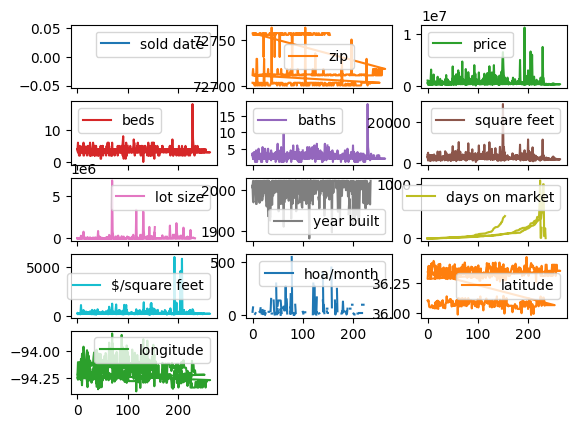

In [ ]:
# Plot numeric variables
data.plot(subplots=True, layout=(5, 3))
plt.show()

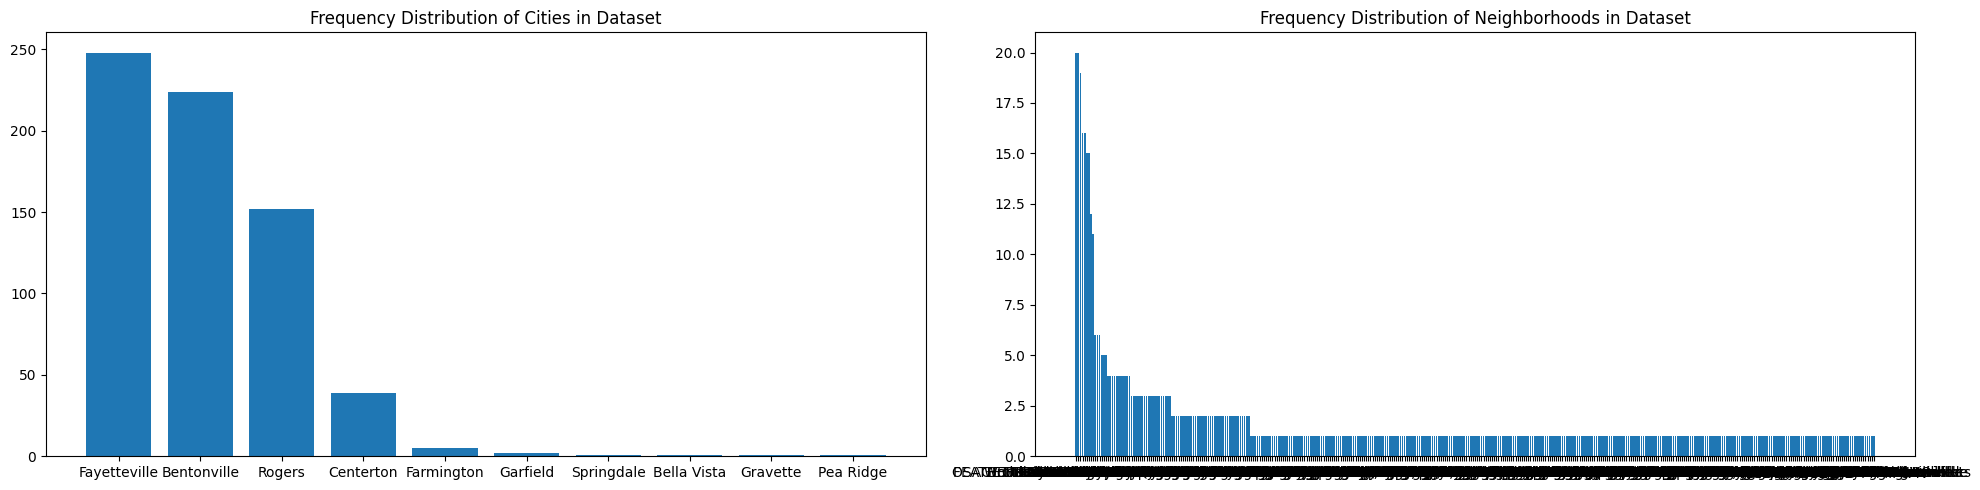

In [ ]:
# Plot freq dist of city and location
city_counts = data['city'].value_counts()
location_counts = data['location'].value_counts()

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.bar(city_counts.index, city_counts.values)
plt.title('Frequency Distribution of Cities in Dataset')

plt.subplot(1, 2, 2)
plt.bar(location_counts.index, location_counts.values)
plt.title('Frequency Distribution of Neighborhoods in Dataset')
plt.tight_layout()
plt.show()

In [ ]:
print(f'Number of unique neighborhoods: {len(location_counts)}')

Number of unique neighborhoods: 375


### Initial Takeaways:
There appear to be a fair number of outliers in the numeric features tied to housing characteristics--price, number of beds and baths, lot size, etc. In addition, the bed and bath variables need to be examined as the minimum for beds is 0 and the max for both is >= 18.0. These will need to be examined. 

We can also see that Fayetteville contains the most inventory, followed by Bentonville and Rogers. These are the 3 cities whose listings I pulled, but there are a few other communities listed as well. Lastly, while there are 375 unqiue neighborhoods included in the listings, the majority of listings are clustered in a handful of them.

# Data Cleaning
## URLs, Street Addresses, and Unique Identifiers
The URLs and street addresses will not be useful features in the dataset, but we may want to be able to refer back to these features. We will remove any listings missing these features, add a unique identifier, and map the these features to their identifier. We will remove the url and address features prior to converting categorical variables to numeric.

In [ ]:
# Get indexes for listings missing address or URLs
no_address_idx = data.loc[data['address'].isna()].index
no_url_idx = data.loc[data['url'].isna()].index

# Remove listings missing address or URLs
data.drop(no_address_idx, inplace=True)
data.drop(no_url_idx, inplace=True)

In [ ]:
# Add a unqiue identifier as a new column
import random

random.seed(42)
np.random.seed(42)

data['id'] = np.random.randint(low=1, high=9999, size=len(data))
ids = data[['id', 'address', 'url']]

In [ ]:
'''# Map addresses and urls to id
id_map = {}
addresses = data['address'].to_list()
urls = data['url'].to_list()
ids = data['id'].to_list()
assert len(addresses) == len(urls) 
assert len(addresses) == len(ids)

for i in range(len(ids)):
  map_entry = {'address': addresses[i], 'url': urls[i]}
  id_map[ids[i]] = map_entry'''

"# Map addresses and urls to id\nid_map = {}\naddresses = data['address'].to_list()\nurls = data['url'].to_list()\nids = data['id'].to_list()\nassert len(addresses) == len(urls) \nassert len(addresses) == len(ids)\n\nfor i in range(len(ids)):\n  map_entry = {'address': addresses[i], 'url': urls[i]}\n  id_map[ids[i]] = map_entry"

## Null Values
* Sold date. All values for sold date are null. 
* Zip. Missing zip codes can be imputed using the geopy module
* Bed & baths. There are a handful of listings missing this info. This may be imputed using KNN or a regression based on the other property details
* Location. This variable refers to the neighborhood the property is in. For now, missing data in this column will be replaced with "Unknown".
* Square feet & dollar/square feet. May be able to impute square feet using KNN and use this to calculate dollar/square feet.
* Lot size. This is missing in a a fair number of listings. I am unsure how I want to impute this for now.
* Year built. This is missing in a fair number of listings. This may correspond to properties that are proposed construction
* HOA. Listings missing this may not have HOA fees. May need to check this manually and replace with 0

In [ ]:
# Drop sold date column as all values are null
data = data.drop('sold date', axis=1)

In [ ]:
# Impute zip code uisng geopy and street address
from geopy.geocoders import Nominatim

# initialize Nominatim API 
geolocator = Nominatim(user_agent="get_zip")

# Get list of addresses where zip is nan and corresponding index in dataframe
missing_zip_idx = np.where(data['zip'].isna())
missing_zip = []
for i in range(len(missing_zip_idx)):
  idx = missing_zip_idx[0][i]
  missing_zip.append((idx, data.iloc[idx]['address']))

# Iterate through rows with missing zips
for address in missing_zip:
  # Get geolocation data and parse
  location = geolocator.geocode(address)
  loc_data = location.raw
  loc_data = loc_data['display_name'].split()
  # Isolate zip code, remove comma in final position of string
  zip = loc_data[-2][:-1]
  # Check that the zip is 5 chars long
  assert len(zip) == 5
  # Impute zip
  data.loc[idx, 'zip'] = zip

# Convert data type to int and verify that there are no missing values for zip 
data['zip'] = data['zip'].astype('int')
data['zip'].info()

<class 'pandas.core.series.Series'>
Int64Index: 671 entries, 0 to 154
Series name: zip
Non-Null Count  Dtype
--------------  -----
671 non-null    int64
dtypes: int64(1)
memory usage: 26.6 KB


In [ ]:
# Examine HOA fees
location_count_missing_hoa = data.loc[data['hoa/month'].isna()]['location'].value_counts()
location_count_missing_hoa

Towne West                          20
Sloanbrooke                         19
OSAGE HILLS SUB PH 1-BENTONVILLE    16
Woodward Hills                      16
Fayetteville Outlots                15
                                    ..
18-20-31-RURAL                       1
Curtis Heights Bentonville           1
03-20-30-RURAL                       1
Creekstone Sub Ph I Bentonville      1
33-19-30-Rogers                      1
Name: location, Length: 259, dtype: int64

A quick web search shows that the communities listed with the most numbers of missing HOA fees--Towne West, Sloanbrooke, Woodard Hills--are neighborhoods without HOA or are new developments that are under construction. As such, we will impute $0 into the rows with NANs.

In [ ]:
# Impute missing HOA fees with $0
data['hoa/month'] = data['hoa/month'].replace(np.nan, 0)

In [ ]:
# Check how many of the listings missing the year built are due to new construction
data.loc[data['year built'].isna()]['sale type'].value_counts()

New Construction Plan    55
MLS Listing              49
Name: sale type, dtype: int64

In [ ]:
# Replace nans in Year Built with 2024 for new construction
data['year built'] = data['year built'].mask(data['sale type']=='New Construction Plan', 2024)

In [ ]:
# Drop urls and street address from dataframe
data.drop(['url', 'address'], axis=1, inplace=True)

In [ ]:
# Convert zip codes to numeric data type
data['zip'] = pd.to_numeric(data['zip'])

In [ ]:
# Impute remaining nulls using KNNImputer
from sklearn.impute import KNNImputer

# Get dummy variables for categorical features
data_quant = pd.get_dummies(data)

# Call and fit imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(data_quant)

# Transform data
data_trans = imputer.transform(data_quant)
data_no_na = pd.DataFrame(data_trans, columns = data_quant.columns)

In [ ]:
pd.set_option('display.max_columns', None)
data_no_na.head()

,zip,price,beds,baths,square feet,lot size,year built,days on market,$/square feet,hoa/month,latitude,longitude,id,sale type_For-Sale-by-Owner Listing,sale type_MLS Listing,sale type_New Construction Home,sale type_New Construction Plan,property type_Condo/Co-op,property type_Multi-Family (2-4 Unit),property type_Multi-Family (5+ Unit),property type_Single Family Residential,property type_Townhouse,city_Bella Vista,city_Bentonville,city_Centerton,city_Farmington,city_Fayetteville,city_Garfield,city_Gravette,city_Pea Ridge,city_Rogers,city_Springdale,location_-,location_--,location_.,location_02-19-29-RURAL,location_03-19-29 Rural,location_03-20-30-RURAL,location_08-20-29-RURAL,location_09-19-30-ROGERS,location_12-19-30 Rogers,location_12-19-30-ROGERS,location_14-19-32 Rural,location_15-20-30 Rural,location_17-15-30,location_17-16-30-Fayetteville Outlots,location_18-19-30-Rogers,location_18-20-31-RURAL,location_22-19-30-ROGERS,location_23-17-28,location_23-19-30,location_24-20-32-RURAL,location_27-16-30 Fayetteville Outlots,location_27-19-29-RURAL,location_27-21-30-RURAL,location_28-19-29-RURAL,location_29-20-29 RURAL,location_33-19-30-Rogers,location_36-17-31,location_AJ SUB-BENTONVILLE,location_ANNIKA ESTATES PH II-CENTERTON,location_Academy Add Rogers,location_Aiken Point Sub Rurban,location_Allied Sub Trac 2,location_Allied Sub Tract 2,location_Altons Brush Creek Hls Rogers,location_Amended Happy Home Add Bentonville,location_Amis Road Add Rogers,location_Anderson Farm,location_Angel Falls,location_Angel Falls North Bentonville,location_Annika Estates,location_Annika Estates Ph 1 Centerton,location_Annika Estates Ph Ii Centerton,location_Atalanta Point Sub Rogers,location_Aurora,location_Aurora Ph 1,location_Aurora Sub Ph 2 Bentonville,location_Aurora Sub Ph I Bentonville,location_Autumn Hills,location_Autumn Hills Bentonville,location_B F Sikes Add,location_Baldwin,location_Banks,location_Banks Add Bentonville,location_Banks Addition,location_Beaver Shores Unit 1 Rurban,location_Beaver Shores Unit 2 Rurban,location_Beaver Shores Unit 4 Rurban,location_Beaver Shores Unit 6 Rurban,location_Beavorama Park Sub,location_Bellafont Gardens Hpr,location_Bellawood Add,location_Belle Heights Bentonville,location_Bentonville Orig Bentonville,location_Bird Haven Terrace,location_Blackburn Add Rogers,location_Braithwaite Park Add Bentonville,location_Bridgeport Sub Ph Vii,location_Brighton Cottages,location_Brighton Cottages Sub Bentonville,location_Brighton Heights Sub Bentonville,location_Brookbury Woods,location_Brooklands @ Mountain Ranch,location_Brookside Estates,location_Brookside Estates Sub Centerton,location_Brophy Add I Ph I,location_Browns Port Sub Rurban,location_Burks Addition,location_Burl Dodd Add,location_Cahill Add Bentonville,location_Cambridge Park Ph 3 Rogers,location_Camden Way Sub Rogers,location_Cardinal Creek Ph 2,location_Cedarwood Add Ph Ii,location_Champions Estates Rogers,location_Champions Estates-Rogers,location_Chapel Hill Ph 1 Bentonville,location_Chardonnay Sub,location_Chardonnay Sub Bentonville,location_Chestnut Farms Sub,location_City/Rogers,location_Clabber Creek Sub Ph I,location_Clarks 2nd Add Bentonville,location_Clarks Add Bentonville,location_Clearwood Crossings Sub,location_Clover Creek Ii,location_Clower Sub Rogers,location_Cobble Creek Sub Rogers,location_College Place Sub PH9-Bentonville,location_College Place Sub Ph 2 Bentonville,location_Commons At Walnut Crossing,location_Copper Creek Sub,location_Copper Mine Acres Rurban,location_Copper Oaks Centerton,location_Cornerstone Ridge,location_Cornerstone Ridge Sub Ph 6 Bentonville,location_Cottonwood Place,location_Country Club Estates Rogers,location_County Court,location_Covington Trace Ph 1 Rurban,location_Coyote Trail,location_Creekside,location_Creekside Meadows,location_Creekside Sub Ph 1 Centerton,location_Creekstone Sub Ph I Bentonville,location_Crescent Lake,location_Crestwood Acres Add,location_Crossover Heights Ph I,location_Cryst

In [ ]:
# Add back addresses and URLs as features 
urls = ids['url'].to_list()
addresses = ids['address'].to_list()
df = data_no_na
df['url'] = urls
df['address'] = addresses

In [ ]:
# Check that addresses and urls match 
first_id_in_df = df.iloc[0]['id']
first_address_in_df = df.loc[df['id']==first_id_in_df]['address'][0]
first_address_in_ids = ids.loc[ids['id']==first_id_in_df]['address'][0]

first_url_in_df = df.loc[df['id']==first_id_in_df]['url'][0]
first_url_in_ids = ids.loc[ids['id']==first_id_in_df]['url'][0]

assert first_address_in_df == first_address_in_ids
assert first_url_in_df == first_url_in_ids

In [ ]:
# Check that there are no missing values
assert df.isnull().values.any() == False

## Addressing Outliers
Its clear that there are outliers in the price, beds, baths, square feet, lot size, year built, and days on the market. Let's take a closer look at each of these and see if any of these need to be removed.




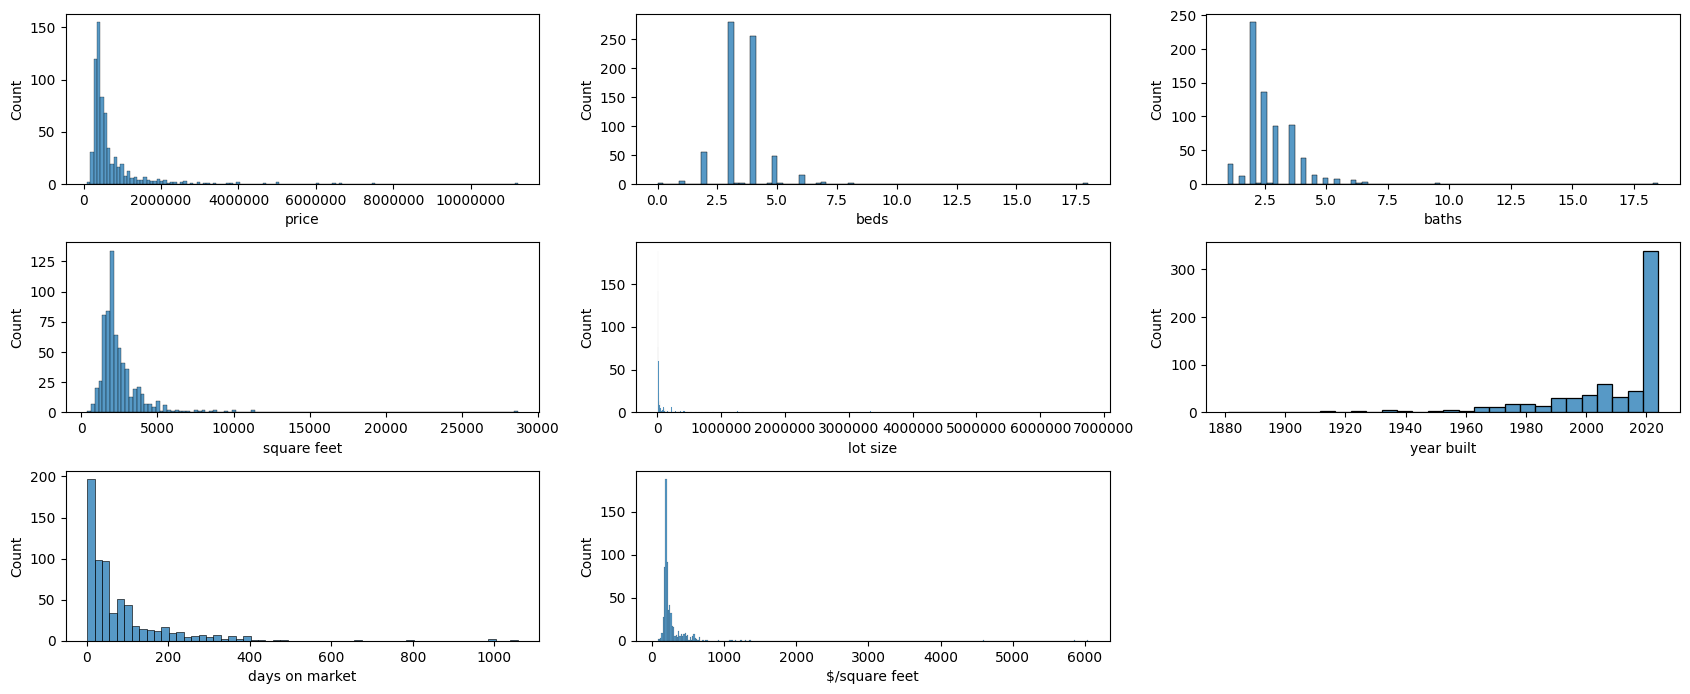

In [ ]:
outlier_cols = ['price', 'beds', 'baths', 'square feet', 'lot size', 'year built', 'days on market', '$/square feet']

plt.figure(figsize=(17,7))
for i in range(1, len(outlier_cols)+1):
  plt.subplot(3, 3, i)
  sns.histplot(df[outlier_cols[i-1]])
  plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()

Most of the numeric variables center around common value and have a long tail. This intuitively makes sense, as residential properties are relatively uniform. The less common, more expensive properties will show higher values, bed and bath counts, etc. One noteworthy observation is the drastic spike in new housing--over 300 properties have been built since 2020. 

There does appear to be one concerning property with an unusually high number of bedrooms and bathrooms. I'd like to look at the listing for this property to check if this is a valid data point.

In [ ]:
df.loc[df['baths']>10]['url'].to_list()

['https://www.redfin.com/AR/Fayetteville/400-N-Oliver-Ave-72701/home/126708594']

It checks out--the high bed and bath count is not an error. 

The dataset is successfully cleaned and can be exported.

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Regis Practicum II/cleaned_redfin_listings.csv'
df.to_csv(path)